<a href="https://colab.research.google.com/github/UknowYunmo/Image-Processing/blob/main/12-Knn%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbor

* KNN은 지도학습(Unsupervised Learning)의 가장 간단한 예시
* 다양한 레이블의 데이터 중에서 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식

result :  [[1.]]
neighbours : [[1. 1. 0.]]
distance:  [[101. 117. 125.]]
1.0


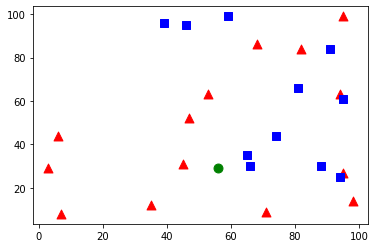

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32) # 0~99 중 랜덤하게 x,y축(2개)씩 뽑는 요소가 25개
response = np.random.randint(0, 2, (25, 1)).astype(np.float32) # 0,1 중 랜덤하게 1개의 레이블(네모 or 삼각형)
#print(trainData)

red = trainData[response.ravel() == 0] # 레이블에 따라 변수 선언
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 한 개의 새로운 데이터 추가
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

# 가까운 3개를 찾고, 거리를 고려하여 자신을 결정
print(ret)
print("result : ", results) # 최종 결정된 자신의 레이블(0 or 1)
print("neighbours :", neighbours) # 가까운 3개의 레이블
print("distance: ", dist) # 3개와의 각각의 거리

plt.show()